# An introduction to durations

In this demonstration we reconstruct the first part of the Kyrie in Ockeghem's Missa Prolationum. 

## Ockeghem, Missa Prolationum

<img src="assets/ockeghem-orig.png" alt="Score" style="width: 600px;"/>

The Kyrie is structured as a double canon, where the imitation replies with an augmented version by interpreting the durations using a different prolatio. In some cases there are minor exceptions. To account for these we use properties to set the augmented duration of the imitation (see the notes with 'setdur'). 

> **Properties**: Any note/chord can have a user-defined set of properties. These properties are implemented as a dict mapping string keys to any value and are normally used to attach data to a note in place in order to perform some action later

In [1]:
from maelzel.core import *

### Cantus

The first voice of the canon, the cantus. 

In [2]:
cantus = Chain([
    Note("4F", 4),
    Note("4C", 4),
    Note("4F", 4),
    Note("4A", 4),
    Rest(2),
    # Each Note/Chord can have user-defined properties. These can be used to attach any data to them
    Note("4E", 2, properties={'setdur': 4}),
    Note("4F", 4),
    Note("4E", 2),
    Note("4C", 2),
    Note("4C", 2),
    Rest(2),
    Note("4F", 4, properties={'setdur': 4}),
    Note("4G", 3),
    Note("4E", 1),
    Note("4E", 2),
    Note("4F", 3),
    Note("4A", 1.5),
    Note("4B", 0.5),
    Note("5C", 1),
    Note("4B", 1),
    Note("4B", 2),
    Note("4A", 0.5),
    Note("4B", 0.5),
    Note("5C", 2),
    Rest(2),
    Note("4A", 2),
    Note("4F", 2),
    Note("4G", 2),
    Note("4F", 2),
    Note("4E", 2),
    Note("4C", 4, properties={'setdur': 4}),
    Note("5C", 2),
    Note("4Bb", 1),
    Note("5D", 2),
    Note("5C", 0.5),
    Note("4Bb", 0.5),
    Note("4A", 6),
    Note("4F", 2),
    Note("4F", 3),
    Note("4E", 0.5),
    Note("4D", 0.5),
    Note("4C", 2)
])


### Contra

In [3]:

contra = Chain([
    Note("4F", 6),
    Note("4A", 3),
    Note("4F", 3, properties={'setdur': 6}),
    Note("5C", 6),
    Note("4A", 3),
    Note("4F", 3, properties={'setdur': 6}),
    Note("4C", 4),
    Note("5C", 2),
    Note("5C", 2),
    Note("4A", 2),
    Note("4A", 2),
    Note("4G", 4),
    Note("4A", 2),
    Note("4F", 2),
    Note("5C", 4),
    Note("5D", 2),
    Note("5D", 2),
    Note("5C", 4),
    Note("4F", 2),
    Note("4A", 2),
    Note("4G", 1.5),
    Note("4F", 0.5),
    Note("4D", 2),
    Note("4A", 3),
    Note("4B", 1),
    Note("5C", 2),
    Note("4A", 2),
    Rest(1),
    Note("4Bb", 2),
    Note("4A", 1),
    Note("5C", 2),
    Note("4F", 4),
    Note("4F", 2),
    Note("3Bb", 4),
    Note("4F", 2),
    Note("4F", 1),
    Note("4A", 2),
    Note("4B", 1),
    Note("5C", 2)    
])

contra = contra.transpose(-12)

Here we calculate the duration of the imitation, using the previously set properties to account for the exceptions to the rule

Score(2 voices)
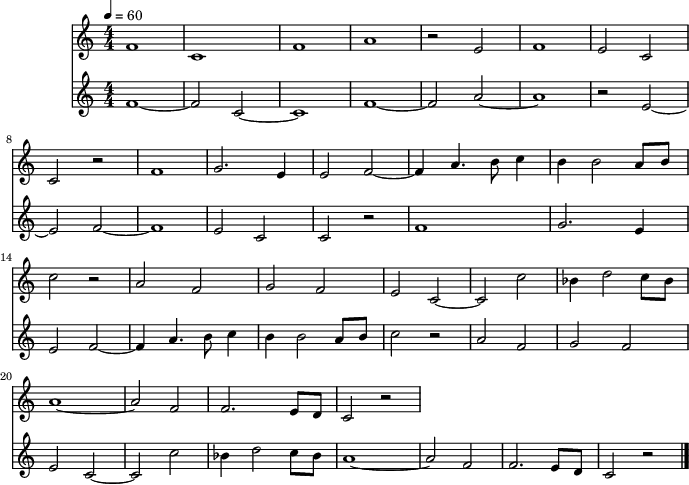

In [4]:
def cantusProlatio(n):
    if dur := n.getProperty('setdur'):
        return dur
    elif n.dur == 4:
        return n.dur * 1.5
    return n.dur
    
cantus2 = Chain([n.clone(dur=cantusProlatio(n)) for n in cantus])

Score([cantus, cantus2])

Score(2 voices)
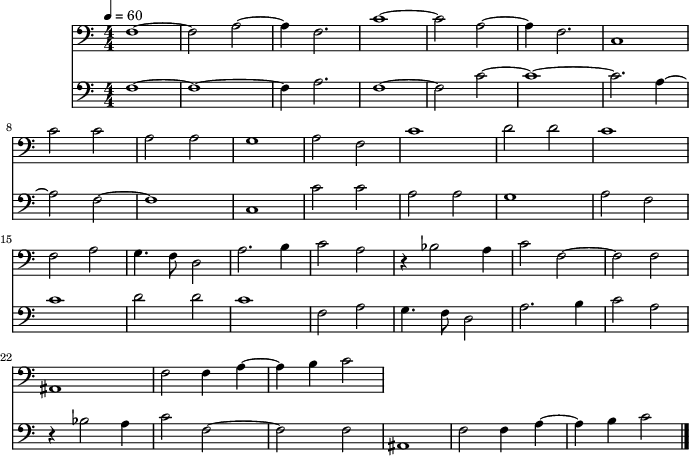

In [5]:
def contraProlatio(n):
    if dur := n.getProperty('setdur'):
        return dur
    elif n.dur == 6:
        return n.dur * F(3, 2)
    return n.dur
    
contra2 = Chain(n.clone(dur=contraProlatio(n))
                for n in contra)

Score([contra, contra2])
    

Score(4 voices)
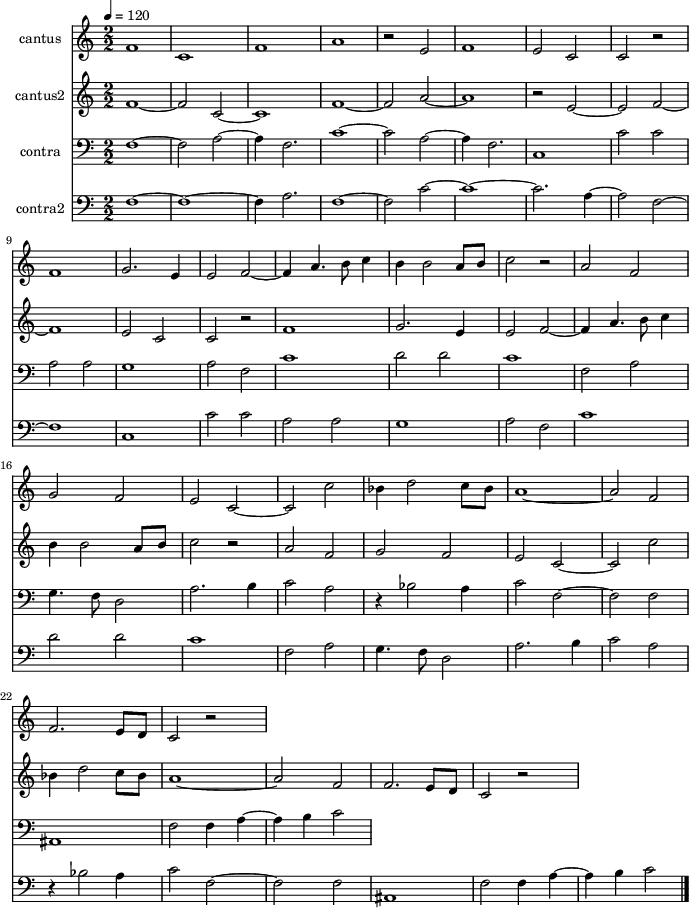

In [8]:
struct = ScoreStruct(timesig=(2, 2), tempo=120)
# setScoreStruct(struct)

origscore = Score([Voice(cantus, name='cantus'),
                   Voice(cantus2, name='cantus2'),
                   Voice(contra, name='contra'),
                   Voice(contra2, name='contra2')
                  ], scorestruct=struct)
origscore

For playback we will use a very simple singing voice based on the formants of a male tenor. To match
the range it might be a good idea to transpose the score down.

Score(4 voices)
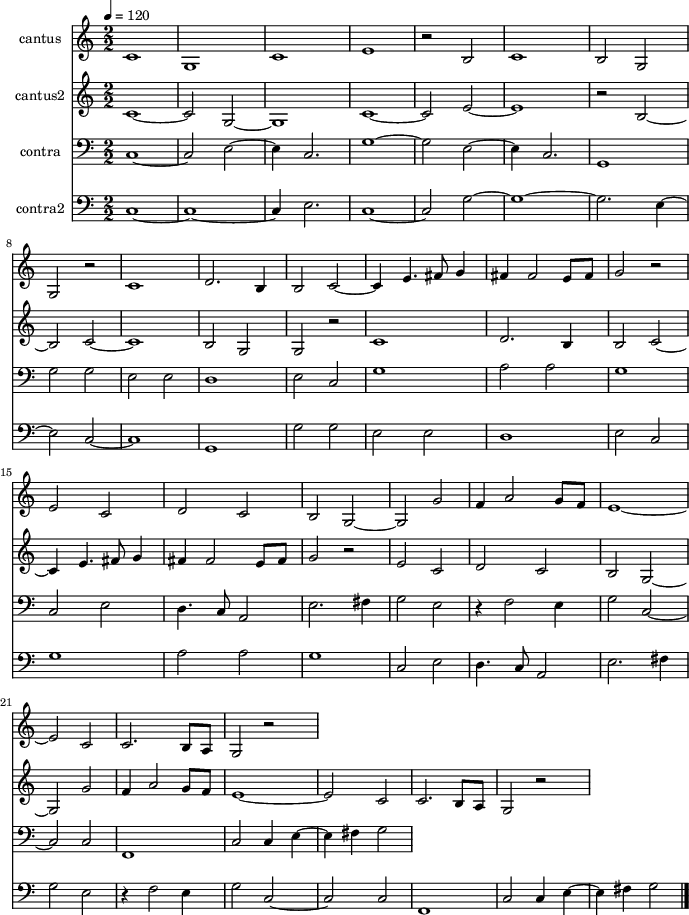

In [9]:
s = origscore.transpose(-5)
s

## Playback 
For playback we can define a simple singing preset with formant values for a male voice. Here we will not get into the details: for now it is enough to notice that we define values for 5 vowels (a, e, i, o, u) which are placed on the 2D plane and we can select a vowel by setting its corresponding coordinate

In [10]:
defPreset('sing',
    init=r"""
    gi__formantFreqs__[] fillarray   \
        668, 1191, 2428, 3321, 4600, \  ; A
        327, 2157, 2754, 3630, 4600, \  ; E 
        208, 2152, 3128, 3425, 4200, \  ; I
        335, 628, 2689, 3515, 4200,  \  ; O
        254, 796, 2515, 3274, 4160      ; U

    gi__formantDbs__[] fillarray   \
        28, 28, 22, 20, 20,        \
        15, 25, 24, 20, 23,        \
        10, 20, 27, 26, 20,        \
        15, 18, 5,  7,  12,        \
        12, 10, 6,  5,  12

    gi__formantBws__[] fillarray   \
        80, 90, 120, 130, 140,     \
        60, 100, 120, 150, 200,    \
        60, 90, 100, 120, 120,     \
        40, 80, 100, 120, 120,     \
        50, 60, 170, 180, 200

    gi__formantAmps__[] maparray gi__formantDbs__, "ampdb"
    reshapearray gi__formantFreqs__, 5, 5
    reshapearray gi__formantAmps__, 5, 5
    reshapearray gi__formantBws__, 5, 5
    """,
    audiogen = r"""
    |kx=0, ky=0, kvibamount=1|
    kx *= random:i(0.95, 1.05)
    ky *= randomi:k(0.96, 1.04, 1)
    kvibfreq = linsegr:k(0, 0.1, 0, 0.4, 4.7, 0.2, 1) * randomi:k(0.9, 1.1, 3)
    kvibsemi = linsegr:k(0, 0.2, 0, 0.8, 0.4, 0.2, 0) * randomi:k(0.85, 1.15, 8)
    kvib = oscil:k(kvibsemi/2, kvibfreq) - kvibsemi/2
    kpitch = lag:k(kpitch, 0.2) + kvib*kvibamount
    asource = butterlp:a(vco2:a(kamp, mtof(kpitch)), 4000)
    ;                   x    y    weight
    kcoords[] fillarray 0,   0,   1,      \  ; A
                        0.5, 0.5, 0.3,    \  ; E
                        1,   0,   1,      \  ; I
                        0,   1,   1,      \  ; O
                        1,   1,   1          ; U

    kweights[] presetinterp kx, ky, kcoords, 0.2
    kformantFreqs[] weightedsum gi__formantFreqs__, kweights
    kformantBws[]   weightedsum gi__formantBws__, kweights
    kformantAmps[]  weightedsum gi__formantAmps__, kweights
    kformantFreqs poly 5, "lag", kformantFreqs, 0.2
    kformantAmps  poly 5, "lag", kformantAmps, 0.2
    aformants[] poly 5, "resonx", asource, kformantFreqs, kformantBws, 2, 1
    aformants *= kformantAmps
    aout1 = sumarray(aformants) * 0.1
    """
)

Preset: sing  
    routing=True
  init: gi__formantFreqs__[] fillarray   \
        668, 1191, 2428, 3321, 4600, \  ; A
        327, 2157, 2754, 3630, 4600, \  ; E 
        208, 2152, 3128, 3425, 4200, \  ; I
        335, 628, 2689, 3515, 4200,  \  ; O
        254, 796, 2515, 3274, 4160      ; U

    gi__formantDbs__[] fillarray   \
        28, 28, 22, 20, 20,        \
        15, 25, 24, 20, 23,        \
        10, 20, 27, 26, 20,        \
        15, 18, 5,  7,  12,        \
        12, 10, 6,  5,  12

    gi__formantBws__[] fillarray   \
        80, 90, 120, 130, 140,     \
        60, 100, 120, 150, 200,    \
        60, 90, 100, 120, 120,     \
        40, 80, 100, 120, 120,     \
        50, 60, 170, 180, 200

    gi__formantAmps__[] maparray gi__formantDbs__, "ampdb"
    reshapearray gi__formantFreqs__, 5, 5
    reshapearray gi__formantAmps__, 5, 5
    reshapearray gi__formantBws__, 5, 5
  |kx=0.0, ky=0.0, kvibamount=1.0|
  kx *= random:i(0.95, 1.05)
  ky *= randomi:k(0.96, 1.04, 1)
  kvibfreq = linsegr:k(0, 0.1, 0, 0.4, 4.7, 0.2, 1) * randomi:k(0.9, 1.1, 3)
  kvibsemi = linsegr:k(0, 0.2, 0, 0.8, 0.4, 0.2, 0) * randomi:k(0.85, 1.15, 8)
  kvib = oscil:k(kvibsemi/2, kvibfreq) - kvibsemi/2
  kpitch = lag:k(kpitch, 0.2) + kvib*kvibamount
  asource = butterlp:a(vco2:a(kamp, mtof(kpitch)), 4000)
  ;                   x    y    weight
  kcoords[] fillarray 0,   0,   1,      \  ; A
                      0.5, 0.5, 0.3,    \  ; E
                      1,   0,   1,      \  ; I
                      0,   1,   1,      \  ; O
                      1,   1,   1          ; U

  kweights[] presetinterp kx, ky, kcoords, 0.2
  kformantFreqs[] weightedsum gi__formantFreqs__, kweights
  kformantBws[]   weightedsum gi__formantBws__, kweights
  kformantAmps[]  weightedsum gi__formantAmps__, kweights
  kformantFreqs poly 5, "lag", kformantFreqs, 0.2
  kformantAmps  poly 5, "lag", kformantAmps, 0.2
  aformants[] poly 5, "resonx", asource, kformantFreqs, kformantBws, 2, 1
  aformants *= kformantAmps
  aout1 = sumarray(aformants) * 0.1

Make the voices sing some "random" vowels

In [16]:
vowels= {
    'a': (0,   0,   1),
    'e': (0.5, 0.5, 1),
    'i': (1,   0,   1.3),
    'o': (0,   1,   2),
    'u': (1,   1,   2)
}

# Vowel patterns for each voice
patterns = ["aaeo", "auoai", "aeaoe", "aiuoeu"]

# Panning position for each voice
positions = [0, 0.3, 0.7, 1]

for voice, pattern, position in zip(s.voices, patterns, positions):
    voice.setPlay(instr='sing', position=position)
    for i, n in enumerate(voice):
        if n.isRest():
            continue
        vowel = pattern[i%len(pattern)]
        x, y, gain = vowels[vowel]
        gain *= 1 if n.dur >= 1 else 1.3
        # Set the vowel coords in advance
        n.setPlay(args={'kx': x, 'ky': y}, gain=gain)

We can add a very simple reverb to the playback. For that we access the underlying sound session, which is a csoundengine's `Session` (https://csoundengine.readthedocs.io/en/latest/session.html) 

In [13]:
session = playSession()
session.defInstr("postproc", r'''
    a1, a2 monitor
    a1post, a2post reverbsc a1, a2, 0.75, 12000, sr, 0.5, 1
    outch 1, a1post - a1, 2, a2post - a2
''')

Instr(postproc)

We render the result to a soundfile for the purpose of having the audio embedded in the notebook. We could just as well render it in realtime by replacing `render` with `play` 

OfflineRenderer(sr=44100)
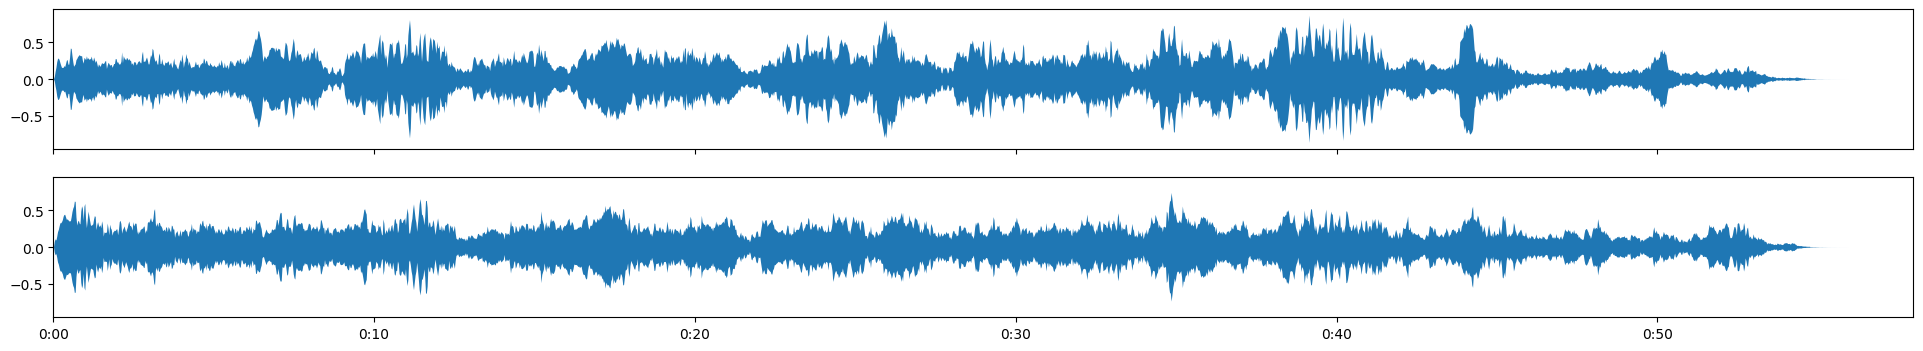

In [17]:
# Make sure that the reverb has time to die off
totalDuration = s.durSecs() + 4  

with render() as r:
    r.sched('postproc', dur=totalDuration, priority=2)
    s.play(sustain=0.15, fade=(0.05, 0.15))
r